In [1]:
import pandas as pd

# 트레이닝 데이터 불러오기
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 테스트 데이터 불러오기
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Understanding Data    
실제 데이터 분석을 시작하기 전에, 데이터의 구조를 이해하는 것은 중요하다.     
train, test 데이터가 둘다 데이터 프레임 객체이므로 `describe()` 메소드를 통해 데이터 프레임에 담긴 데이터들을 탐색해볼 수 있다.   
`describe`는 데이터 프레임의 칼럼들과 특징들을 요약해준다.  
또한, 평균값, 최대값등의 정보도 제공해준다.  
데이터를 탐색하는 또다른 유용한 방법은 `.shape`속성을 통해 차원을 확인하는 것이다.  

In [3]:
train.shape
# 총 891개의 데이터와 12개의 칼럼이 있음을 확인할 수 있음

(891, 12)

In [4]:
train.describe()
# 나이(Age) 데이터의 개수가 714개인걸로 보아 결측치(Missing Value)가 있음을 확인할 수 있다.  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.shape
# 테스트 데이터는 418개의 데이터와 11개의 칼럼이 있음을 확인할 수 있다.

(418, 11)

In [6]:
test.describe()
# 테스트데이터에서는 나이(Age)와 요금(Fare)에서 Missing Value가 있는걸 확인해볼 수 있다.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


`pandas.DataFrame.info` 메소드는 각 칼럼별 데이터 개수와 타입 등 데이터프레임에 담긴 데이터들의 정보들을 간략하게 요약해준다.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


info,describe로도 결측치가 있는 컬럼들을 확인할 수 있지만   
판다스는 결측치를 확인할수 있는 `isnull`메소드를 제공하고 있다.    
(참고 : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)

In [9]:
train.isnull().sum()
# 트레이닝셋에서 Age, Cabin, Embarked 칼럼에 결측치가 있는것을 확인할 수 있다. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

타이타닉 생존여부에 영향을 끼치는 요인은 어떠한 것이 있을까?      
영화를 본 사람들이라면 남성보단 여성이, 그리고 어린아이들, 계급이 높은 사람들이 구명보트 탑승에 우선권을 가진다는것을 알것이다.    
실제로 성별, 나이, 계급 등이 생존여부에 영향을 미치는지 알아보려 한다.  
`pandas.Series.value_counts` 메소드를 이용하면 카테고리 값을 확인할 수 있다.  
만약 수치값이 아닌 비율을 확인하고 싶다면 파라미터에 `normalize=True`를 넣어주면 된다.

In [11]:
train['Survived'].value_counts()

# 트레이닝셋에서 549명이 죽고 342명이 살았다는것을 확인할 수 있다.

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
# 성별이 남성(male)인 경우 약 80%가 죽고, 20%가 살았음을 확인할 수 있다.
train['Survived'][train['Sex'] ==  'male'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [14]:
# 성별이 여성(female)인 경우 약 75%가 살아남고, 20%가 죽었음을 확인할 수 있다.
train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

### 카테고리별 특징추출을 위한 바 차트(Bar Chart) 그리기   
   
위에서 성별에 따른 생존비율을 확인하였더니 여성의 생존비율이 남성보다 월등히 높음을 확인할 수 있었다.   
단순히 수치로 확인하는것도 좋지만, 이것을 시각화해서 차트로 표현하면 데이터 파악을 더 쉽고 직관적으로 할 수 있을것이다.   
파이썬 시각화 라이브러리를 이용해서 성별이나 좌석등급등에 따른 생존비율이 어떻게 되는지 확인해보자.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

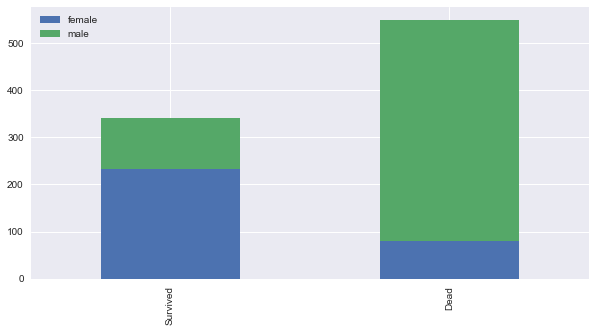

In [17]:
# 성별에 따른 생존 비율을 바차트로 확인할 수 있다.
bar_chart('Sex')

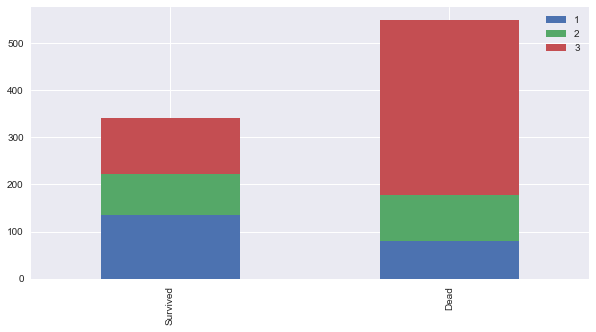

In [18]:
# 좌석등급에 따른 생존 비율을 확인할 수 있다.
# 높은 등급에 탑승한 사람들의 생존율이 조금 더 높음을 확인할 수 있다. 
bar_chart('Pclass')

### Feature Engineering   
Feature Enginerring은 머신러닝 알고리즘을 만들기 위해 데이터에 대한 도메인 지식을 이용하는 과정이라고 보면된다.   
(참고 : https://en.wikipedia.org/wiki/Feature_engineering)  
머신러닝에서 일반적인 알고리즘들은 데이터들이 수치형(numerical)으로 표현될것을 요구한다. (처리와 분석에 용이하기떄문)  
그러니 우리는 주어진 데이터들이 예측에 적합한 형태를 가지게끔 데이터들을 가공할 필요가 있다.    

다시 한번 기존의 데이터들을 확인해보자.   
  

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 성별(Sex) : male은 0으로 female은 1으로
앞에서 성별은 생존율에 영향을 미치는 중요한 변수가 될 수 있음을 확인하였는데,  
성별(Sex)값이 문자열의 형태로 되어있으니, 남성(male)은 0, 여성(female)은 1로 값을 변경하여 설정해줄것이다.

In [20]:
# 변경사항을 트레이닝셋과 테스트셋에 동시에 적용시키기 위해 묶어준다
train_test_data = [ train, test ] 

In [21]:
sex_mapping = { "male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

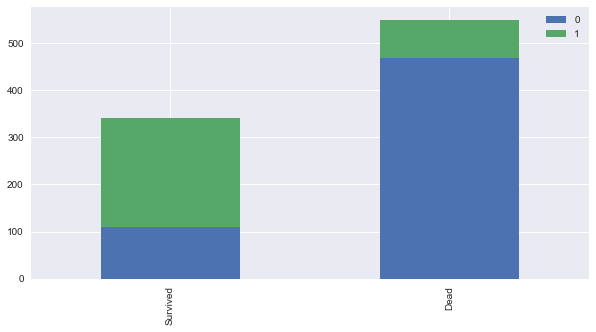

In [22]:
bar_chart('Sex')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### Name (이름) 데이터 파악해보기

이름(Name)은 특별히 타이타닉에서의 생존여부에 별다른 영향을 미치는것처럼 보이지 않는다.  
하지만 이름의 형식을 살펴보면 Mr, Mrs, Miss 등 호칭이 들어간다는것을 알 수 있다.    
이 호칭을 통해 성별, 결혼유무(배우자유무)을 유추할 수 있고 이것은 어쩌면 생존율에 영향을 끼치는 요인일 수 있다.    
  
따라서 이 이름을 통해 호칭을 추출해서 새로운 `Title`변수를 만들어서 담아두자.

In [24]:
# 정규표현식을 이용해 이름에서 호칭을 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Jonkheer      1
Countess      1
Lady          1
Don           1
Mme           1
Sir           1
Ms            1
Name: Title, dtype: int64

In [26]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

호칭을 추출했으나 이것역시 수치형 데이터값으로 변경시켜주어야 한다.  
Mr는 0으로,  
Miss는 1으로,  
Mrs는 2로,  
그밖의 다른 호칭은 3으로 설정하여 준다.  

In [27]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


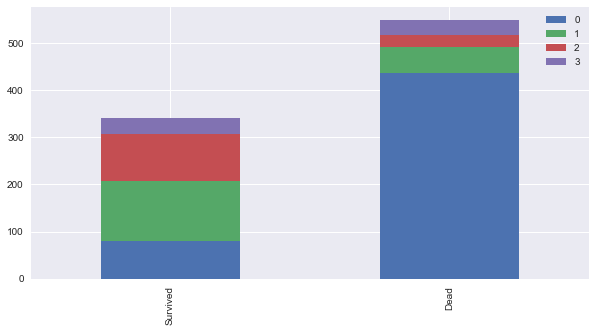

In [29]:
bar_chart('Title')

# 차트를 통해 Mr(남자)가  Miss나 Mrs(여자)보다 확실히 많이 사망한것을 확인할 수 있다.

In [30]:
#이제 불필요한 특징인 이름 데이터는 데이터셋에서 지워주자.  
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis=1, inplace = True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


#### 나이 (Age) : Missing Value를 처리해주자    
  
우리는 초기에 데이터를 파악할때, Age(나이) 필드가 결측치를 가지고 있음을 확인했다.  
이제 이 결측치를 처리해주어야하는데, 일반적으로 데이터들 전체 나이값의 평균값을 채워줄 수도 있지만,  
우리는 앞에서 호칭변수를 획득하였다.  
Title별로 구분해서 각 평균값을 구하여 나이변수에 대한 Missing Value를 처리해보도록 하자.

In [32]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [33]:
train["Age"].isnull().sum()

0

#### Bining  (구간화)  
   
수치형 나이값을 범주형 변수로 바꿔보자.  
데이터 비닝은 사소한 관측 오류의 영향을 줄이기 위해 사용되는 데이터 전처리 기술, 데이터 버킷화
예를 들어, 사람 그룹에 대한 데이터가 있고 나이가 주어질때, 10대, 20대, 30대로 분류하여 1, 2, 3 값을 부여하는것.

feature vector map 
* child ( age <= 16) : 0
* young (age > 16 & age <= 26) : 1
* adult(age > 26 & age <= 36) : 2* mid-age (age > 36 & age <= 62) : 3
* senior (age > 62) : 4


In [34]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


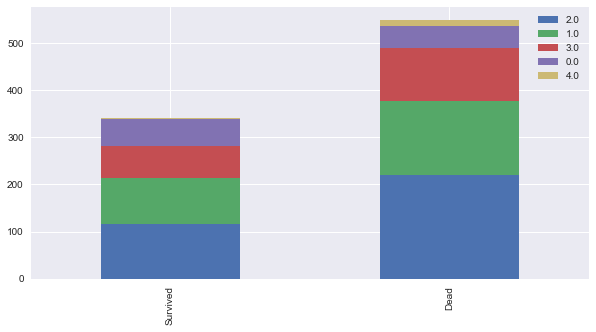

In [36]:
bar_chart('Age')

#### Embarked    
   
Embarked는 어디서 승선했는지(?)를 알려준다.  
C = Cherbourg, Q = Queenstown, S = Southampton

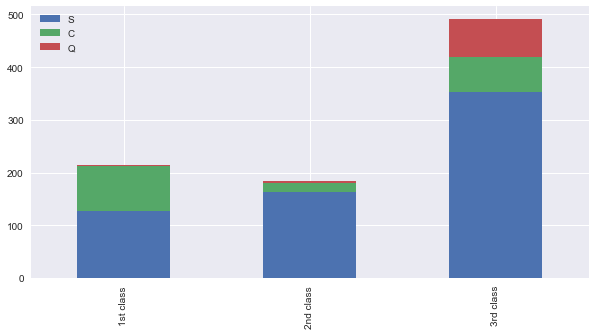

In [46]:
# 좌석 등급별로 어디서 승선했는지 확인해봄.
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = [ '1st class', '2nd class', '3rd class' ]
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))  

# 일반적으로 embarked 데이터는 S값이 보편적인것을 확인가능

In [49]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [50]:
# emrbarked의 Msiing Value를 'S'로 채워주자.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [53]:
# embarked 값이 S, C, Q로 문자값이 들어가있으니 이걸 숫치형(numerical)으로 변경해주자.

embarked_mapping = { "S" : 0, "C" : 1, "Q" : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset["Embarked"].map(embarked_mapping)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [66]:
# Fare(요금) 결측치는 등급(PClass)별 요금의 중간값으로 넣어주자.

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


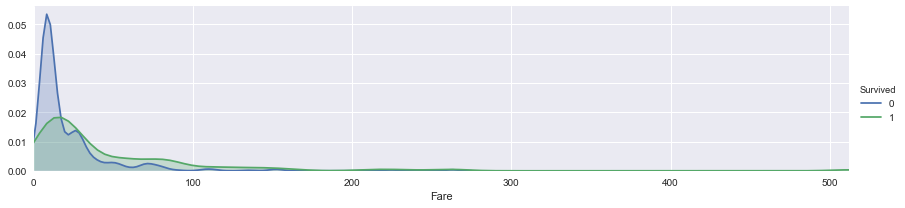

In [69]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

# 차트를 그려보면, 저렴한  티켓을 산 사람들이 많이 죽은것을 알수있음

In [70]:
# binning 

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare' ] = 0,
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare' ] = 1,
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

### Cabin

cabin은 방이라고 생각하면됨. 

In [71]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [72]:
# Cabin 값은 알파벳 + 숫자형태를 가짐
# 숫자는 핸들링하기 어려우므로, 앞의 문자(Character)만 가져온다.

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [76]:
dataset['Cabin'].head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12      B
13    NaN
14      E
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Cabin, dtype: object

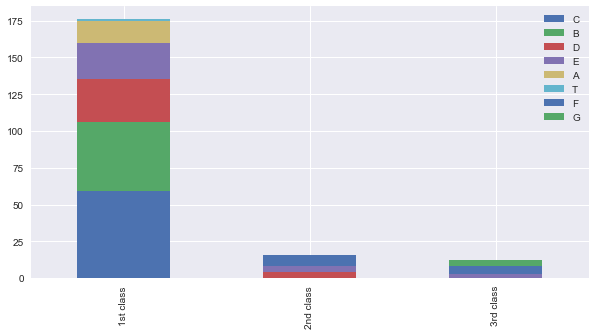

In [82]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# 1등급에 있는 데이터들이 2,3등급에  없는 경우가 있다. 

A, B, C, D, E, F, G  Cabin정보를 숫자로 매핑해준다.   
소수점을 사용한 이유는, Feature Scaling 라고 하는데.   
머신러닝 Classifier는 숫자로 사용하고 계산할떄 유클리드 거리를 씀   
(범위를 비슷하게 맞춰주어야함)   

In [83]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [86]:
# Mssing Vlaue
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [109]:
train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

In [110]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [111]:
train_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,1,0,0.0,2.0,0,0
1,2,1,1,3.0,1,0,2.0,0.8,1,2
2,3,3,1,1.0,0,0,0.0,2.0,0,1
3,4,1,1,2.0,1,0,2.0,0.8,0,2
4,5,3,0,2.0,0,0,0.0,2.0,0,0
5,6,3,0,2.0,0,0,0.0,2.0,2,0
6,7,1,0,3.0,0,0,2.0,1.6,0,0
7,8,3,0,0.0,3,1,1.0,2.0,0,3
8,9,3,1,2.0,0,2,0.0,2.0,0,2
9,10,2,1,0.0,1,0,2.0,1.8,1,2


## Modeling

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 83.6+ KB


### Cross Validation (K-fold)

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

### kNN

In [112]:
clf  ==  KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.52222222 0.64044944 0.53932584 0.58426966 0.61797753 0.57303371
 0.50561798 0.5505618  0.56179775 0.47191011]


In [113]:
# kNN Score
round(np.mean(score) * 100, 2)

55.67

### Decision Tree

In [115]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.71111111 0.79775281 0.74157303 0.75280899 0.74157303 0.79775281
 0.73033708 0.70786517 0.73033708 0.7752809 ]


In [117]:
# decision tree 점수
round(np.mean(score) * 100, 2)

74.86

### Random Forest

In [120]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.82222222 0.80898876 0.80898876 0.80898876 0.82022472 0.78651685
 0.78651685 0.70786517 0.7752809  0.80898876]


In [121]:
# Random Forest Score
round(np.mean(score) * 100, 2)

79.35

### Naive Bayes

In [124]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.84444444 0.71910112 0.75280899 0.74157303 0.70786517 0.80898876
 0.76404494 0.78651685 0.84269663 0.83146067]


In [125]:
# Naive Bayes Score
round(np.mean(score) * 100, 2)

78.0

### SVM

In [128]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.54444444 0.68539326 0.5505618  0.59550562 0.70786517 0.6741573
 0.56179775 0.6741573  0.61797753 0.57303371]


In [129]:
round(np.mean(score) * 100, 2)

61.85

### Testing

In [130]:
clf = RandomForestClassifier(n_estimators = 13)
clf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
test_data['Survived'] = 0

In [139]:
train_data.shape, target.shape, test_data.shape

((891, 10), (891,), (418, 10))

In [148]:
prediction = clf.predict(test_data)

In [149]:
submission  = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('data/submission.csv', index=False)

In [150]:
submission.to_csv('data/submission.csv', index=False)

In [151]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
